In [1]:
%pip install joblib
%pip install scikit-learn
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("E:\\Backup F4 26.04.2023\\Downloads\\Employee-Attrition - Employee-Attrition.csv")


In [4]:
display (df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df.info()
df.isnull()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [7]:
df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'StandardHours','Over18', 'DailyRate', 'HourlyRate', 'MonthlyRate', 'NumCompaniesWorked'],
        inplace=True)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,1,2,0,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,1,8,1,1,3,1,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1,2,2,4,4,1,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1,3,4,1,4,0,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,1,2,1,3,1,1,3,...,3,4,1,6,3,3,2,2,2,2


In [8]:
print(df.shape)


(1470, 27)


In [9]:
df ['TenurePerJobLevel'] = df ['YearsAtCompany'] / (df ['JobLevel'] + 1)
df ['PromotionLag'] = df ['YearsSinceLastPromotion'] / (df ['YearsAtCompany'] + 1)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenurePerJobLevel,PromotionLag
0,41,1,2,2,1,2,1,2,0,3,...,0,8,0,1,6,4,0,5,2.000000,0.000000
1,49,0,1,1,8,1,1,3,1,2,...,1,10,3,3,10,7,1,7,3.333333,0.090909
2,37,1,2,1,2,2,4,4,1,2,...,0,7,3,3,0,0,0,0,0.000000,0.000000
3,33,0,1,1,3,4,1,4,0,3,...,0,8,3,3,8,7,3,0,4.000000,0.333333
4,27,0,2,1,2,1,3,1,1,3,...,1,6,3,3,2,2,2,2,1.000000,0.666667


EDA

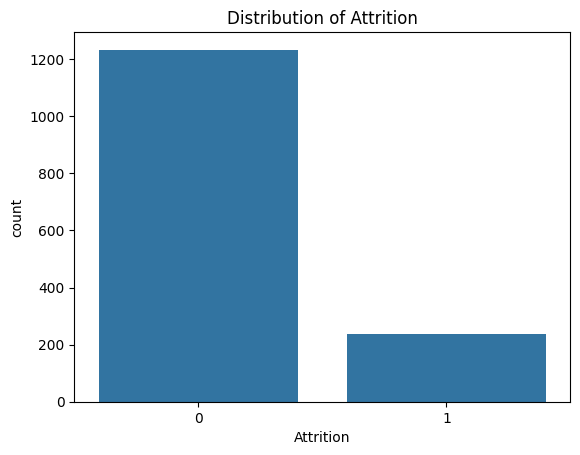

Attrition
0    1233
1     237
Name: count, dtype: int64


In [10]:
sns.countplot(x='Attrition', data=df)
plt.title("Distribution of Attrition")
plt.show()
print(df['Attrition'].value_counts())

DENSITY ESTIMATION

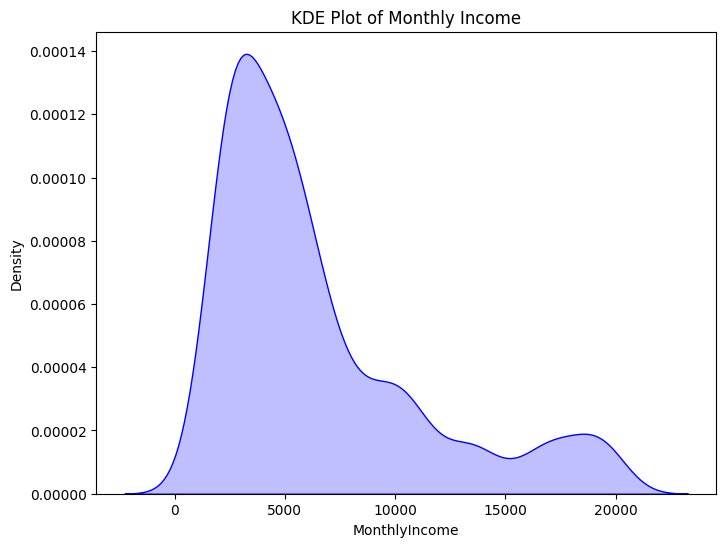

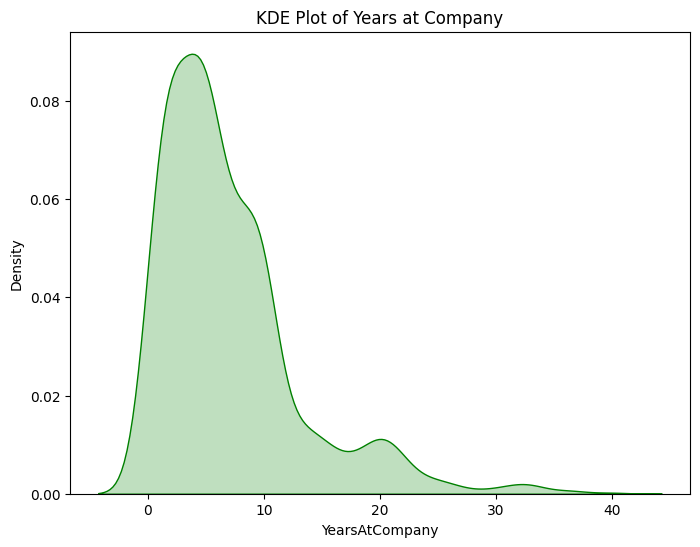

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df["MonthlyIncome"], fill=True, color="blue")
plt.title("KDE Plot of Monthly Income")
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df["YearsAtCompany"], fill=True, color="green")
plt.title("KDE Plot of Years at Company")
plt.show()


DISTRIBUTION AND OUTLIERS

C:\Users\Deepi\AppData\Local\Temp\ipykernel_9324\46534014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Attrition"], y=df["MonthlyIncome"], palette="muted")


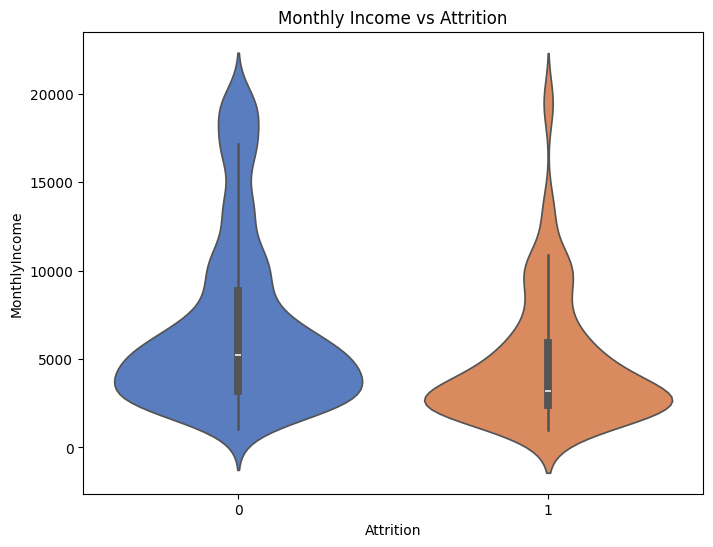

In [12]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df["Attrition"], y=df["MonthlyIncome"], palette="muted")
plt.title("Monthly Income vs Attrition")
plt.show()

CATEGORICAL FEATURE BREAKDOWN

C:\Users\Deepi\AppData\Local\Temp\ipykernel_9324\2805134812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["JobLevel"], y=df["MonthlyIncome"], palette="viridis")


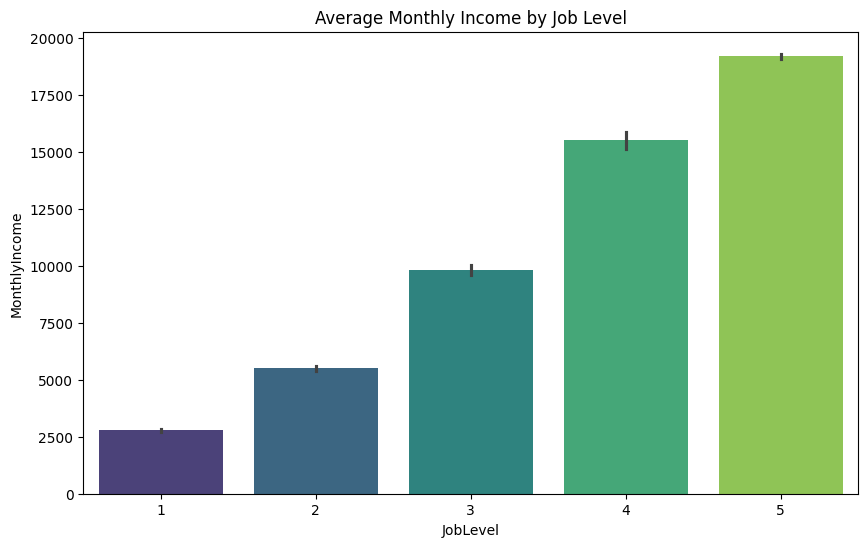

C:\Users\Deepi\AppData\Local\Temp\ipykernel_9324\2805134812.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Education"], y=df["MonthlyIncome"], palette="magma")


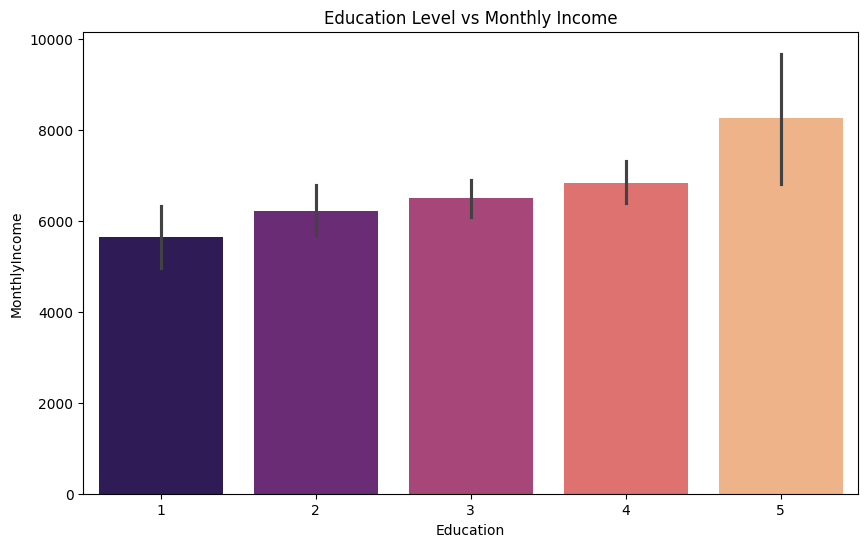

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df["JobLevel"], y=df["MonthlyIncome"], palette="viridis")
plt.title("Average Monthly Income by Job Level")
plt.show()

plt.figure(figsize=(10, 6))
plt.figure(figsize=(8, 6))
sns.violinplot(x=df["Attrition"], y=df["MonthlyIncome"], palette="muted")
plt.title("Monthly Income vs Attrition")
sns.barplot(x=df["Education"], y=df["MonthlyIncome"], palette="magma")
plt.title("Education Level vs Monthly Income")
plt.show()

FEATURE INTERACTIONS

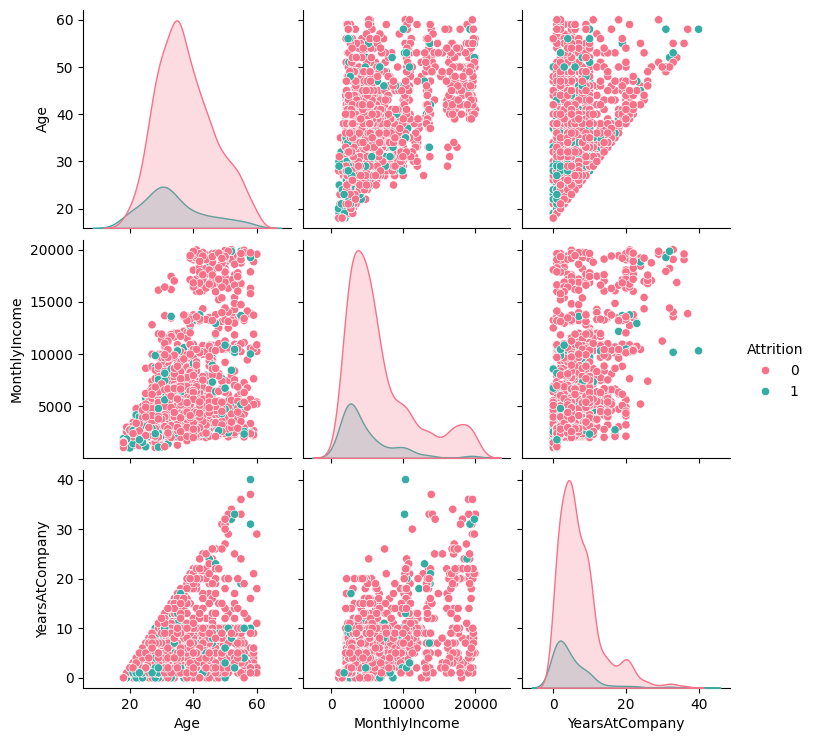

In [ ]:
sns.pairplot(df[['Age', 'MonthlyIncome', 'YearsAtCompany', 'Attrition']], hue="Attrition", palette="husl")
plt.show()

VISUAL OUTLIER DETECTION

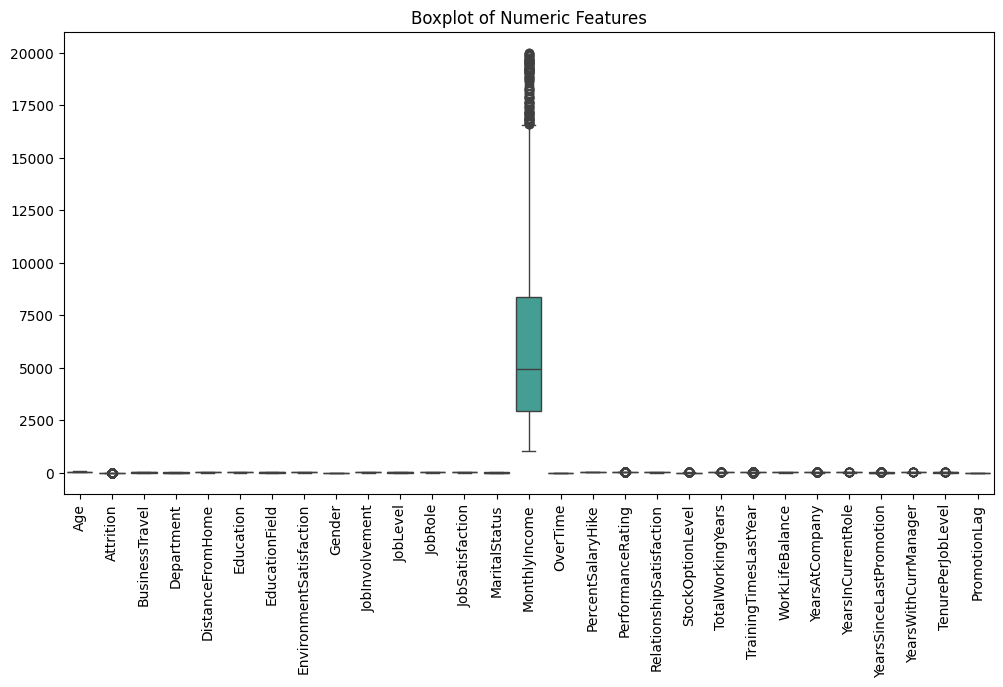

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Features")
plt.show()

CORRELATION HEATMAP

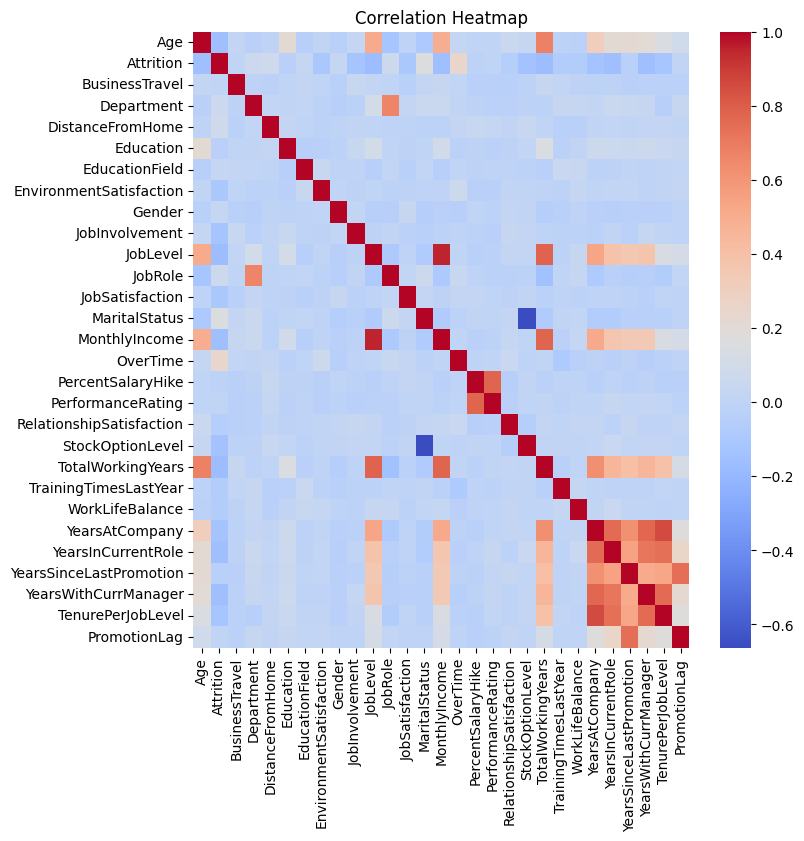

In [16]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot= False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

In [17]:
df.to_csv("preprocessed_employee_attrition.csv", index=False)
print("✅ Preprocessing complete. Saved as 'preprocessed_employee_attrition.csv'.")

✅ Preprocessing complete. Saved as 'preprocessed_employee_attrition.csv'.


MODEL TRAINING

In [18]:
# Split the dataset into features and target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [31]:
display(X)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenurePerJobLevel,PromotionLag
0,41,2,2,1,2,1,2,0,3,2,...,0,8,0,1,6,4,0,5,2.000000,0.000000
1,49,1,1,8,1,1,3,1,2,2,...,1,10,3,3,10,7,1,7,3.333333,0.090909
2,37,2,1,2,2,4,4,1,2,1,...,0,7,3,3,0,0,0,0,0.000000,0.000000
3,33,1,1,3,4,1,4,0,3,1,...,0,8,3,3,8,7,3,0,4.000000,0.333333
4,27,2,1,2,1,3,1,1,3,1,...,1,6,3,3,2,2,2,2,1.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,1,23,2,3,3,1,4,2,...,1,17,3,3,5,2,0,3,1.666667,0.000000
1466,39,2,1,6,1,3,4,1,2,3,...,1,9,5,3,7,7,1,7,1.750000,0.125000
1467,27,2,1,4,3,1,2,1,4,2,...,1,6,0,3,6,2,0,3,2.000000,0.000000
1468,49,1,2,2,3,3,4,1,2,2,...,0,17,3,2,9,6,0,8,3.000000,0.000000


In [19]:
# Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [20]:
# Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [21]:
# Model 1: Logistic Regression
# Train the logistic regression model 
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [22]:
# Make predictions on the test set
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
y_pred_lr = (y_proba_lr >= 0.5).astype(int)

In [23]:
# Evaluate the logistic regression model
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
roc_auc = roc_auc_score(y_test, y_proba_lr)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
# Classification report
report = classification_report(y_test, y_pred_lr)

In [24]:
print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)



Logistic Regression Model Evaluation:
Accuracy: 0.7423
Precision: 0.7319
Recall: 0.7582
F1 Score: 0.7448
ROC AUC Score: 0.8351
Confusion Matrix:
[[226  85]
 [ 74 232]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       311
           1       0.73      0.76      0.74       306

    accuracy                           0.74       617
   macro avg       0.74      0.74      0.74       617
weighted avg       0.74      0.74      0.74       617



In [25]:
# Model 2: Random Forest
# Train the random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
# Make predictions on the test set
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = (y_proba_rf >= 0.5).astype(int)


In [27]:
# Evaluate the random forest model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_proba_rf)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
# Classification report
report = classification_report(y_test, y_pred_rf)

In [28]:
# Display
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)


Random Forest Model Evaluation:
Accuracy: 0.9433
Precision: 0.9593
Recall: 0.9248
F1 Score: 0.9418
ROC AUC Score: 0.9801
Confusion Matrix:
[[299  12]
 [ 23 283]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       311
           1       0.96      0.92      0.94       306

    accuracy                           0.94       617
   macro avg       0.94      0.94      0.94       617
weighted avg       0.94      0.94      0.94       617



In [29]:
# Save the trained models
pickle.dump(lr_model, open("lr_model.pkl", "wb"))
pickle.dump(rf_model, open("rf_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(encoders, open("encoders.pkl", "wb"))
print("✅ Model, scaler, and encoders saved successfully.")

✅ Model, scaler, and encoders saved successfully.
